In [2]:
# 2_Model_Building.ipynb

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load cleaned data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Split the data into features (X) and target (y)
X_train = train
y_train = train['SalePrice']
X_test = test
y_test = test['SalePrice']

In [10]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR (Linear)': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor()
}

In [11]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R^2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                           RMSE       R^2
Linear Regression  3.565094e-11  1.000000
Decision Tree      2.078682e+03  0.999377
Random Forest      1.764820e+03  0.999551
SVR (Linear)       2.525499e-02  1.000000
KNN                1.770869e+03  0.999548


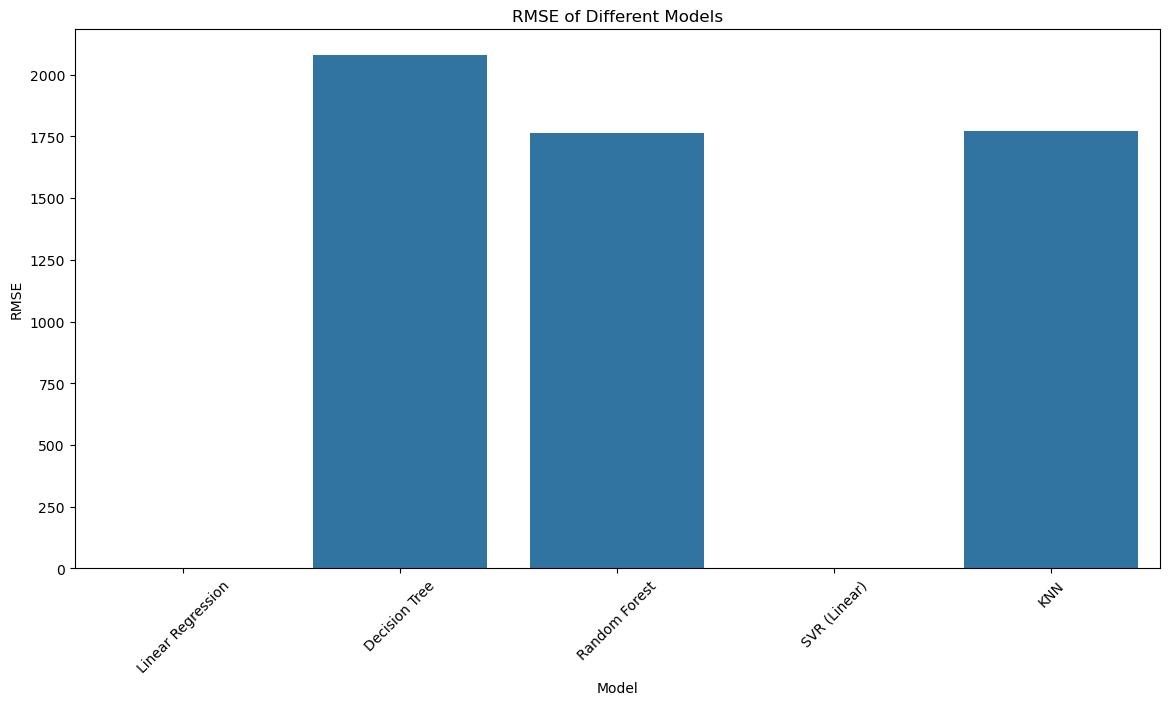

In [12]:
# Plotting the performance of the models
plt.figure(figsize=(14, 7))
sns.barplot(x=results_df.index, y='RMSE', data=results_df)
plt.title('RMSE of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

Best parameters for SVR (Linear): {'C': 0.001}
                            RMSE  R^2
Linear Regression   3.565094e-11  1.0
Tuned SVR (Linear)  2.525499e-02  1.0


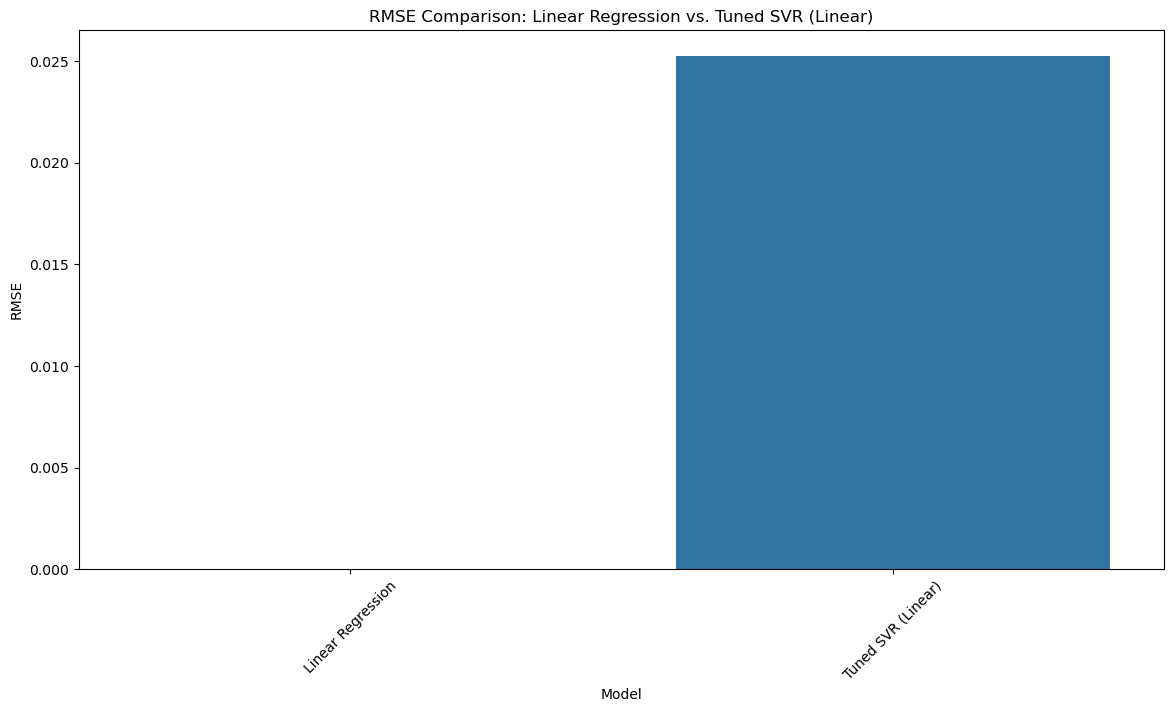

In [16]:
# Hyperparameter tuning for SVR (Linear)
from sklearn.model_selection import GridSearchCV

param_grid_svr_linear = {
    'C': [0.001, 0.01, 0.1]
}

grid_search_svr_linear = GridSearchCV(SVR(kernel='linear'), param_grid_svr_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_svr_linear.fit(X_train, y_train)
best_svr_linear = grid_search_svr_linear.best_estimator_
print(f"Best parameters for SVR (Linear): {grid_search_svr_linear.best_params_}")

# Evaluate the best SVR (Linear) model
y_pred_svr_linear = best_svr_linear.predict(X_test)
rmse_svr_linear = mean_squared_error(y_test, y_pred_svr_linear, squared=False)
r2_svr_linear = r2_score(y_test, y_pred_svr_linear)

# Compare with Linear Regression
y_pred_lr = models['Linear Regression'].predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# Display comparison results
comparison_results = {
    'Linear Regression': {'RMSE': rmse_lr, 'R^2': r2_lr},
    'Tuned SVR (Linear)': {'RMSE': rmse_svr_linear, 'R^2': r2_svr_linear}
}

comparison_results_df = pd.DataFrame(comparison_results).T
print(comparison_results_df)

# Plotting the performance of the tuned SVR (Linear) and Linear Regression
plt.figure(figsize=(14, 7))
sns.barplot(x=comparison_results_df.index, y='RMSE', data=comparison_results_df)
plt.title('RMSE Comparison: Linear Regression vs. Tuned SVR (Linear)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()